In [17]:
from align import Align
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import dlib 
import os.path
import cv2

from keras.models import Model

In [2]:
from model import create_model

model = create_model()
model.load_weights('vgg_face_weights.h5')

In [5]:
def load_img(path):
    img = cv2.imread(path, 1)
    img = img[..., ::-1]
    return img

In [62]:
def align_img(rgbImg, imgDim=96, pred_path='shape_predictor_5_face_landmarks.dat'):
    return Align(pred_path).align(rgbImg, imgDim)[0]

In [12]:
class IdentityData():
    def __init__(self, folder, name, file):
        self.folder = folder
        self.name = name
        self.file = file
        
    def image_path(self):
        return os.path.join(self.folder, self.name, self.file)
    
    def __repr__(self):
        return self.image_path()
    
def load_data(path):
    data = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                data.append(IdentityData(path, i, f))
                
    return np.array(data)

photos = load_data('../images/')

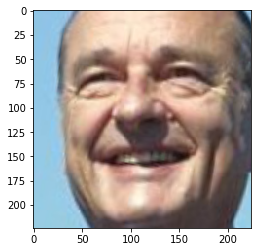

In [52]:
img = load_img(photos[0].image_path())
align_faces = align_img(img, 224)
plt.imshow(align_faces[0])

In [14]:

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [18]:
face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [73]:
def verify_faces(idx1, idx2, align=align_img, photos=photos):
    img1 = load_img(photos[idx1].image_path())
    img2 = load_img(photos[idx2].image_path())
    
    face_img1 = align(img1, 224)
    face_img2 = align(img2, 224)
    
    face_img1 = np.expand_dims(face_img1, axis=0)
    face_img2 = np.expand_dims(face_img2, axis=0)
                         
    face_img1_rep = face_descriptor.predict(face_img1)[0, :]
    face_img2_rep = face_descriptor.predict(face_img2)[0, :]
    
    cosine = findCosineSimilarity(face_img1_rep, face_img2_rep)
    euc = findEuclideanDistance(face_img1_rep, face_img2_rep)
    
    print("Cosine similarity: ", cosine)
    print("Euclidean distance: ", euc)
    
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.show()

Cosine similarity:  0.2662869095802307
Euclidean distance:  120.718704


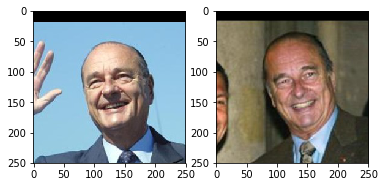

Cosine similarity:  0.2670227885246277
Euclidean distance:  123.28852


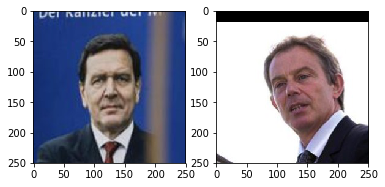

Cosine similarity:  0.22371125221252441
Euclidean distance:  118.96406


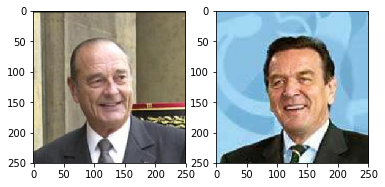

Cosine similarity:  0.27470189332962036
Euclidean distance:  124.248856


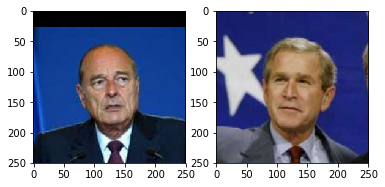

Cosine similarity:  0.49713337421417236
Euclidean distance:  180.63788


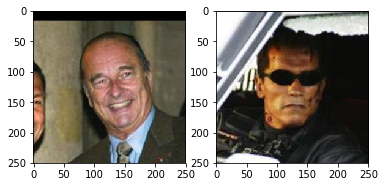

In [54]:
verify_faces(0, 2)
verify_faces(10, 33)
verify_faces(5, 12)
verify_faces(3, 97)
verify_faces(2, 50)

In [56]:
from krasserm_align import AlignDlib

alingment = AlignDlib('shape_predictor_68_face_landmarks.dat')

In [59]:
def krasserm_align(img, imgDim=96):
    return alingment.align(imgDim, img, alingment.getLargestFaceBoundingBox(img), landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

Cosine similarity:  0.2519013285636902
Euclidean distance:  172.99573


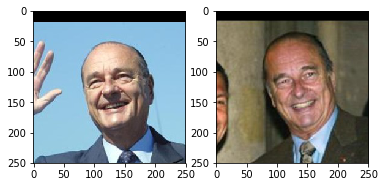

Cosine similarity:  0.3840993642807007
Euclidean distance:  144.83661


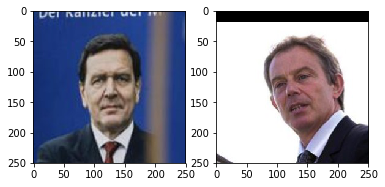

Cosine similarity:  0.17172956466674805
Euclidean distance:  119.28161


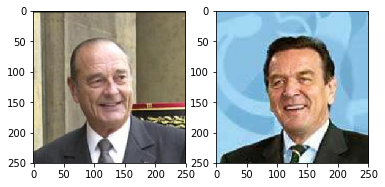

Cosine similarity:  0.2954707145690918
Euclidean distance:  148.39561


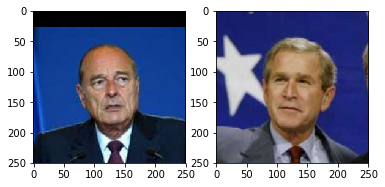

Cosine similarity:  0.4469163417816162
Euclidean distance:  153.60368


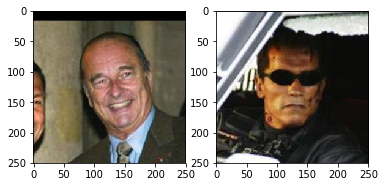

In [63]:
verify_faces(0, 2, krasserm_align)
verify_faces(10, 33, krasserm_align)
verify_faces(5, 12, krasserm_align)
verify_faces(3, 97, krasserm_align)
verify_faces(2, 50, krasserm_align)

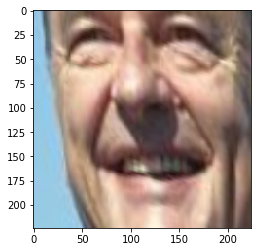

In [65]:
img = load_img(photos[0].image_path())
align_faces = krasserm_align(img, 224)
plt.imshow(align_faces)

In [69]:
hr_photos = load_data('../high_res_images/')

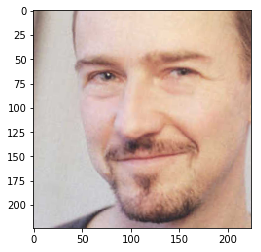

In [72]:
img = load_img(hr_photos[0].image_path())
align_faces = align_img(img, 224)
plt.imshow(align_faces)

Cosine similarity:  0.2087937593460083
Euclidean distance:  109.76541


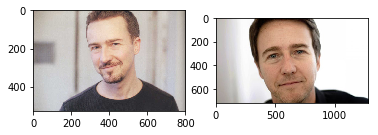

Cosine similarity:  0.4284786581993103
Euclidean distance:  144.09137


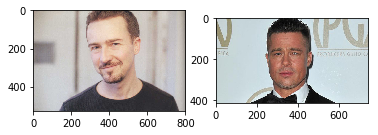

Cosine similarity:  0.3694329857826233
Euclidean distance:  142.32382


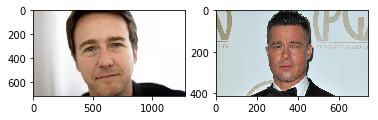

Cosine similarity:  0.3833661675453186
Euclidean distance:  161.54453


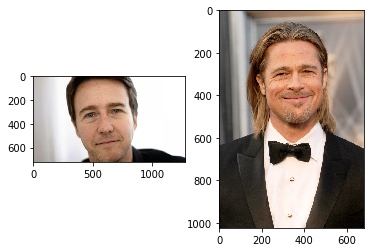

Cosine similarity:  0.31007128953933716
Euclidean distance:  139.78859


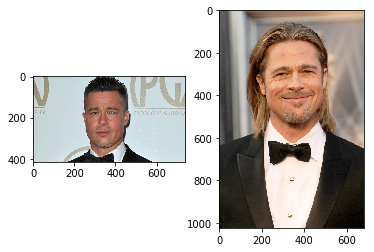

In [77]:
verify_faces(0, 1, align_img, hr_photos)
verify_faces(0, 2, align_img, hr_photos)
verify_faces(1, 2, align_img, hr_photos)
verify_faces(1, 3, align_img, hr_photos)
verify_faces(2, 3, align_img, hr_photos)